In [1]:
import sys
sys.path.append('../')
import pandas as pd
from os.path import join
from utils import load_band_training

In [2]:
df = load_band_training('../data/')

In [3]:
df

,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,AB.A.delta.j.Cz,...,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2,main.disorder
0,1.401843,0.044134,0.376737,0.872665,0.632710,0.674663,-0.051640,2.463441,0.727185,0.316562,...,-1.960368,-1.828336,-0.834235,-2.237575,-1.571887,-1.056004,-1.437106,-1.749512,-1.451175,Addictive disorder
1,-0.598990,-0.831898,-0.580495,-0.399746,-0.646163,-0.760259,-0.928095,-0.247000,-0.190511,-0.904587,...,-1.920907,-1.646903,-1.802377,-0.717640,-0.786717,-0.380596,-1.221707,-0.460035,-0.693514,Addictive disorder
2,0.864991,0.520585,-0.059918,0.518451,0.681596,-0.642971,-0.055894,0.134106,0.640365,-0.125900,...,0.798541,-0.972797,0.508607,0.069640,-0.473845,0.180634,-0.582988,-0.074636,-1.304606,Addictive disorder
3,0.116406,0.054719,-0.038510,-0.558181,-0.651358,-0.690558,-0.261922,-0.507216,-0.653714,-0.832252,...,0.448936,-1.117574,-0.754570,0.836607,-1.175390,-0.970917,-0.191512,0.755712,-0.811951,Addictive disorder
4,1.559360,1.016306,0.411452,0.316066,0.247098,0.212488,-0.115742,-0.320617,-0.140817,-0.265077,...,0.210674,-0.299794,-0.116533,0.612477,0.725193,0.531805,1.043846,1.177668,0.687519,Addictive disorder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,1.920656,1.274985,2.591292,1.977997,0.439823,0.445014,0.673639,-0.581053,0.149256,0.068651,...,-1.033592,0.382540,0.179630,-1.048473,0.728507,-0.280148,-0.398653,-1.933256,2.105551,Healthy control
941,-0.106016,-0.145225,0.983334,0.142413,-0.106702,0.078491,-0.062250,0.188989,-0.450927,0.072518,...,0.596205,-0.665884,-0.606643,1.640407,0.312857,1.589646,0.646387,1.473536,-0.037517,Healthy control
942,0.762131,0.915048,-0.602961,0.466180,0.591427,0.647843,0.597974,-0.057392,0.654062,1.733969,...,-1.402976,-0.622419,-1.501164,-1.305380,-1.446712,-1.514037,-1.551426,-1.337352,-1.936933,Healthy control
943,-0.022499,0.328583,-0.330297,-0.269646,-0.395819,-0.376444,0.201354,0.224271,0.125760,-0.074255,...,-0.343885,-0.857288,-1.802866,-1.193971,-0.297441,-2.237214,-0.583182,-2.135257,-1.889161,Healthy control


In [4]:
LABEL_COL = "main.disorder"
df_features = df.drop(LABEL_COL, axis=1)
df_labels = df[LABEL_COL]

In [5]:
label_one_hot = pd.get_dummies(df_labels)

In [6]:
label_one_hot.sum()

Addictive disorder                    186
Anxiety disorder                      107
Healthy control                        95
Mood disorder                         266
Obsessive compulsive disorder          46
Schizophrenia                         117
Trauma and stress related disorder    128
dtype: int64

In [7]:
X = df_features.values
y = label_one_hot.values

In [8]:
X.shape

(945, 1141)

In [9]:
y.shape

(945, 7)

# Training with Tensorflow

In [10]:
from sklearn.model_selection import train_test_split

In [17]:
import numpy as np
# Fill numpy nan values with 0
X = np.nan_to_num(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def model_def():
    
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    return model

In [19]:
model = model_def()
model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])


In [21]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/1000
8/8 [==============================] - 0s 7ms/step - loss: 1.4214 - accuracy: 0.4565 - val_loss: 1.8856 - val_accuracy: 0.3150
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.4231 - accuracy: 0.4526 - val_loss: 1.8761 - val_accuracy: 0.3228
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3474 - accuracy: 0.4743 - val_loss: 1.9069 - val_accuracy: 0.3071
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3662 - accuracy: 0.4802 - val_loss: 1.9305 - val_accuracy: 0.2835
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3627 - accuracy: 0.4822 - val_loss: 1.9299 - val_accuracy: 0.3307
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3711 - accuracy: 0.4802 - val_loss: 1.9115 - val_accuracy: 0.2913
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.3351 - accuracy: 0.4941 - val_loss: 1.9109 - val_accuracy: 0.3150
Epoch 8/1000
8/8 [==

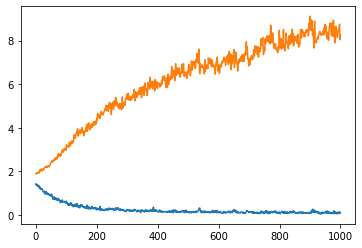

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])